In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [150]:
df = pd.read_csv('/content/train.csv')

In [151]:
df.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
1,1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,25.0
2,2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
3,3,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.4
4,4,0.04544,0.0,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09,19.8


In [152]:
df1=df.drop(columns="ID")
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,25.0
2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
3,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.4
4,0.04544,0.0,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09,19.8


In [153]:
df1.shape

(400, 14)

In [154]:
df1.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,3.757191,10.970000,10.936425,0.072500,0.552817,6.292165,68.086000,3.819462,9.462500,403.797500,18.459000,359.455375,12.668525,22.475750
std,9.155496,22.796261,6.848042,0.259639,0.115488,0.709923,28.386888,2.132445,8.687478,169.656816,2.148105,86.732906,7.207047,9.218611
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.920000,5.000000
25%,0.077820,0.000000,5.130000,0.000000,0.449000,5.877500,42.375000,2.109150,4.000000,277.000000,17.400000,376.115000,6.990000,17.100000
50%,0.242170,0.000000,8.560000,0.000000,0.532000,6.208500,76.950000,3.272100,5.000000,329.000000,18.950000,391.575000,10.875000,21.000000
75%,3.543427,12.500000,18.100000,0.000000,0.624000,6.620500,93.825000,5.214600,24.000000,666.000000,20.200000,396.285000,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [155]:
df1.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [156]:
df1.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

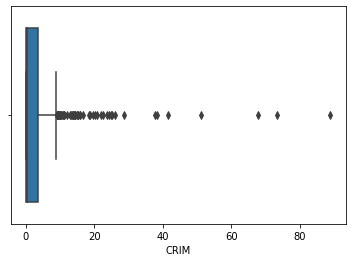

In [157]:
import seaborn as sns
sns.boxplot(df1['CRIM'])

In [158]:
percentile25 = df1['CRIM'].quantile(0.25)
percentile75 = df1['CRIM'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  0.07782
75th percentile of the data is  3.5434275
IQR : 3.4656075


In [159]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

8.74183875
-5.1205912499999995


In [160]:
df1['CRIM'] = np.where(
    df1['CRIM']>max_value,
    max_value,
    np.where(
        df1['CRIM']<min_value,
        min_value,
        df1['CRIM']
    ) 
)
df1['CRIM'].describe()

count    400.000000
mean       2.169891
std        3.224890
min        0.009060
25%        0.077820
50%        0.242170
75%        3.543427
max        8.741839
Name: CRIM, dtype: float64

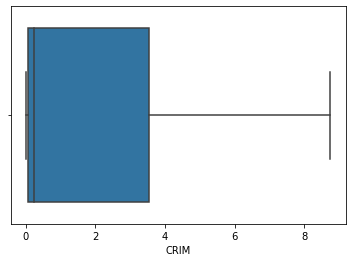

In [161]:
sns.boxplot(df1['CRIM'])

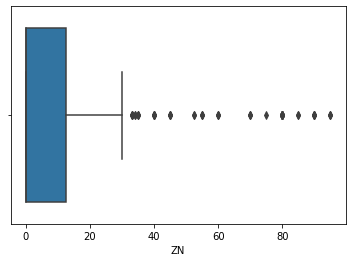

In [162]:
sns.boxplot(df1['ZN'])

In [163]:
percentile25 = df1['ZN'].quantile(0.25)
percentile75 = df1['ZN'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  0.0
75th percentile of the data is  12.5
IQR : 12.5


In [164]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

31.25
-18.75


In [165]:
df1['ZN'] = np.where(
    df1['ZN']>max_value,
    max_value,
    np.where(
        df1['ZN']<min_value,
        min_value,
        df1['ZN']
    ) 
)
df1['ZN'].describe()

count    400.000000
mean       6.820000
std       11.918719
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max       31.250000
Name: ZN, dtype: float64

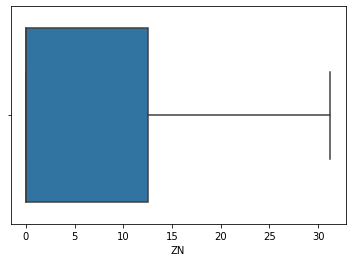

In [166]:
sns.boxplot(df1['ZN'])

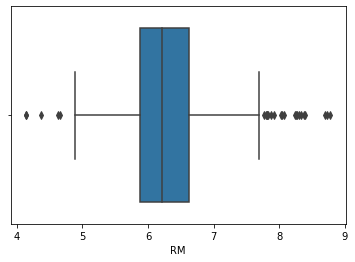

In [167]:
sns.boxplot(df1['RM'])

In [168]:
percentile25 = df1['RM'].quantile(0.25)
percentile75 = df1['RM'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  5.8775
75th percentile of the data is  6.6205
IQR : 0.7429999999999994


In [169]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

7.734999999999999
4.763000000000002


In [170]:
df1['RM'] = np.where(
    df1['RM']>max_value,
    max_value,
    np.where(
        df1['RM']<min_value,
        min_value,
        df1['RM']
    ) 
)
df1['RM'].describe()

count    400.000000
mean       6.275225
std        0.640100
min        4.763000
25%        5.877500
50%        6.208500
75%        6.620500
max        7.735000
Name: RM, dtype: float64

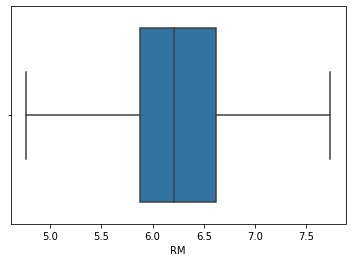

In [171]:
sns.boxplot(df1['RM'])

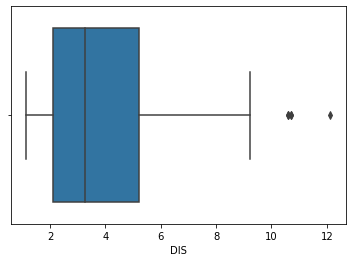

In [172]:
sns.boxplot(df1['DIS'])

In [173]:
percentile25 = df1['DIS'].quantile(0.25)
percentile75 = df1['DIS'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  2.10915
75th percentile of the data is  5.2146
IQR : 3.10545


In [174]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

9.872775
-2.549025


In [175]:
df1['DIS'] = np.where(
    df1['DIS']>max_value,
    max_value,
    np.where(
        df1['DIS']<min_value,
        min_value,
        df1['DIS']
    ) 
)
df1['DIS'].describe()

count    400.000000
mean       3.806075
std        2.089468
min        1.129600
25%        2.109150
50%        3.272100
75%        5.214600
max        9.872775
Name: DIS, dtype: float64

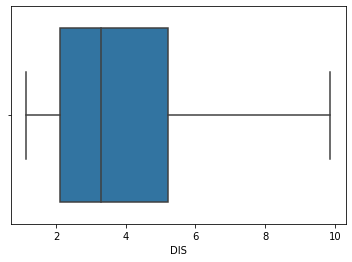

In [176]:
sns.boxplot(df1['DIS'])

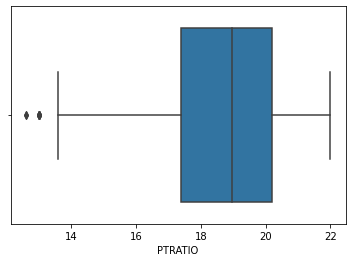

In [177]:
sns.boxplot(df1['PTRATIO'])

In [178]:
percentile25 = df1['PTRATIO'].quantile(0.25)
percentile75 = df1['PTRATIO'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  17.4
75th percentile of the data is  20.2
IQR : 2.8000000000000007


In [179]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

24.4
13.199999999999998


In [180]:
df1['PTRATIO'] = np.where(
    df1['PTRATIO']>max_value,
    max_value,
    np.where(
        df1['PTRATIO']<min_value,
        min_value,
        df1['PTRATIO']
    ) 
)
df1['PTRATIO'].describe()

count    400.00000
mean      18.46750
std        2.12644
min       13.20000
25%       17.40000
50%       18.95000
75%       20.20000
max       22.00000
Name: PTRATIO, dtype: float64

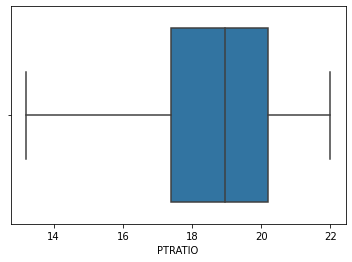

In [181]:
sns.boxplot(df1['PTRATIO'])

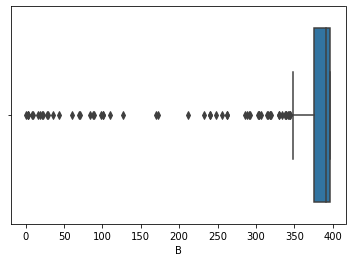

In [182]:
sns.boxplot(df1['B'])

In [183]:
percentile25 = df1['B'].quantile(0.25)
percentile75 = df1['B'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  376.115
75th percentile of the data is  396.28499999999997
IQR : 20.16999999999996


In [184]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

426.5399999999999
345.86000000000007


In [185]:
df1['B'] = np.where(
    df1['B']>max_value,
    max_value,
    np.where(
        df1['B']<min_value,
        min_value,
        df1['B']
    ) 
)
df1['B'].describe()

count    400.00000
mean     382.41335
std       18.34296
min      345.86000
25%      376.11500
50%      391.57500
75%      396.28500
max      396.90000
Name: B, dtype: float64

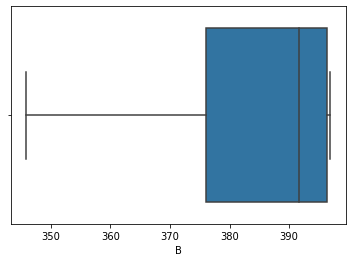

In [186]:
sns.boxplot(df1['B'])

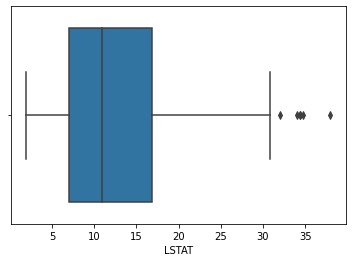

In [187]:
sns.boxplot(df1['LSTAT'])

In [188]:
percentile25 = df1['LSTAT'].quantile(0.25)
percentile75 = df1['LSTAT'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  6.99
75th percentile of the data is  16.91
IQR : 9.92


In [189]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

31.79
-7.889999999999999


In [190]:
df1['LSTAT'] = np.where(
    df1['LSTAT']>max_value,
    max_value,
    np.where(
        df1['LSTAT']<min_value,
        min_value,
        df1['LSTAT']
    ) 
)
df1['LSTAT'].describe()

count    400.00000
mean      12.62655
std        7.08280
min        1.92000
25%        6.99000
50%       10.87500
75%       16.91000
max       31.79000
Name: LSTAT, dtype: float64

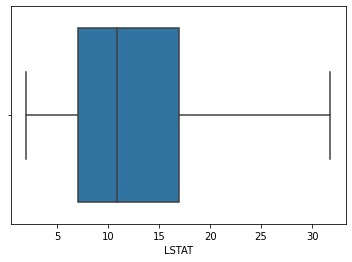

In [191]:
sns.boxplot(df1['LSTAT'])

In [192]:
df1['CHAS'].value_counts()

0    371
1     29
Name: CHAS, dtype: int64

In [193]:
df1 = df1.drop_duplicates()

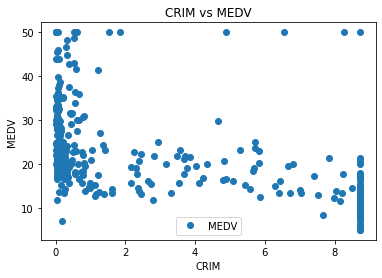

In [194]:
df1.plot(x='CRIM', y='MEDV', style='o')
plt.title('CRIM vs MEDV')
plt.xlabel('CRIM')
plt.ylabel('MEDV')
plt.show()

In [195]:
df1[['CRIM','MEDV']].corr()

,CRIM,MEDV
CRIM,1.000000,-0.466535
MEDV,-0.466535,1.000000


There is Linear relationship in between the CRIM feature and MEDV target.

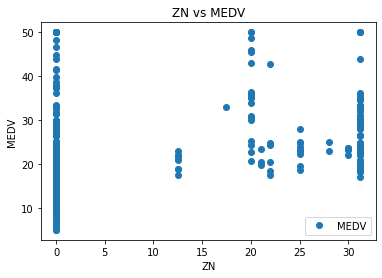

In [196]:
df1.plot(x='ZN', y='MEDV', style='o')
plt.title('ZN vs MEDV')
plt.xlabel('ZN')
plt.ylabel('MEDV')
plt.show()

In [197]:
df1[['ZN','MEDV']].corr()

,ZN,MEDV
ZN,1.000000,0.361314
MEDV,0.361314,1.000000


There is a Linear relationship between ZN feature and MEDV target.

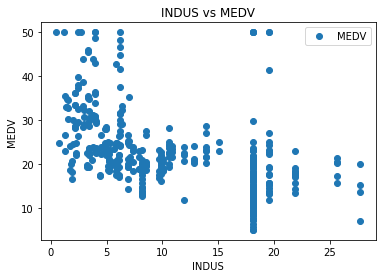

In [198]:
df1.plot(x='INDUS', y='MEDV', style='o')
plt.title('INDUS vs MEDV')
plt.xlabel('INDUS')
plt.ylabel('MEDV')
plt.show()

In [199]:
df1[['INDUS','MEDV']].corr()

,INDUS,MEDV
INDUS,1.000000,-0.502898
MEDV,-0.502898,1.000000


There is a Linear relationship between the INDUS feature and MEDV target.

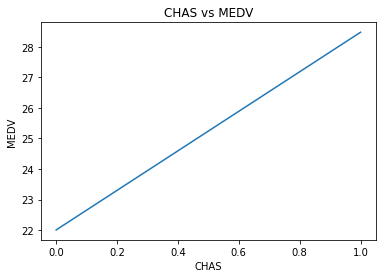

In [200]:
df1.groupby('CHAS')['MEDV'].mean().plot()
plt.title('CHAS vs MEDV')
plt.xlabel('CHAS')
plt.ylabel('MEDV')
plt.show()

There is a Linear relationship in between the CHAS feature and MEDV target.

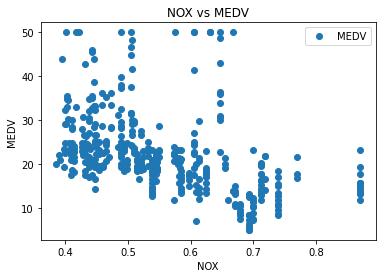

In [201]:
df1.plot(x='NOX', y='MEDV', style='o')
plt.title('NOX vs MEDV')
plt.xlabel('NOX')
plt.ylabel('MEDV')
plt.show()

In [202]:
df1[['NOX','MEDV']].corr()

,NOX,MEDV
NOX,1.000000,-0.434271
MEDV,-0.434271,1.000000


There is a Linear relationship in between the NOX feature and MEDV target.

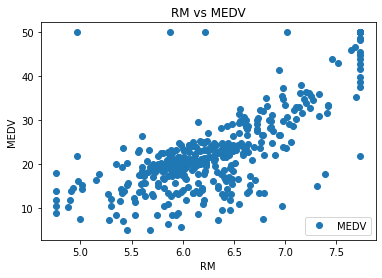

In [203]:
df1.plot(x='RM', y='MEDV', style='o')
plt.title('RM vs MEDV')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

In [204]:
df1[['RM','MEDV']].corr()

,RM,MEDV
RM,1.000000,0.712445
MEDV,0.712445,1.000000


There is a Linear relationship in between the RM feature and MEDV target.

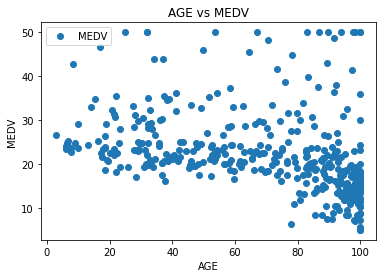

In [205]:
df1.plot(x='AGE', y='MEDV', style='o')
plt.title('AGE vs MEDV')
plt.xlabel('AGE')
plt.ylabel('MEDV')
plt.show()

In [206]:
df1[['AGE','MEDV']].corr()

,AGE,MEDV
AGE,1.000000,-0.354106
MEDV,-0.354106,1.000000


There is a Linear relationship in between the AGE feature and MEDV target.

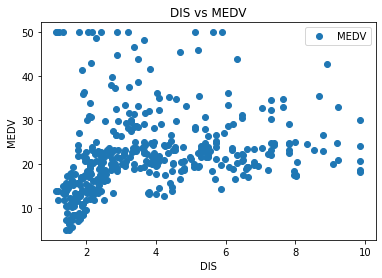

In [207]:
df1.plot(x='DIS', y='MEDV', style='o')
plt.title('DIS vs MEDV')
plt.xlabel('DIS')
plt.ylabel('MEDV')
plt.show()

In [208]:
df1[['DIS','MEDV']].corr()

,DIS,MEDV
DIS,1.000000,0.238502
MEDV,0.238502,1.000000


There is a Linear relationship in between the DIS feature and MEDV target.

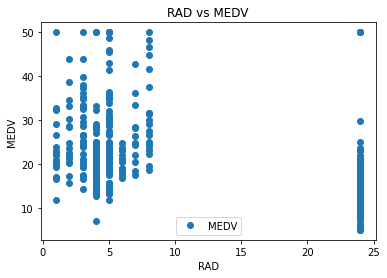

In [209]:
df1.plot(x='RAD', y='MEDV', style='o')
plt.title('RAD vs MEDV')
plt.xlabel('RAD')
plt.ylabel('MEDV')
plt.show()

In [210]:
df1[['RAD','MEDV']].corr()

,RAD,MEDV
RAD,1.000000,-0.386922
MEDV,-0.386922,1.000000


There is a Linear relationship in between the RAD feature and MEDV target.

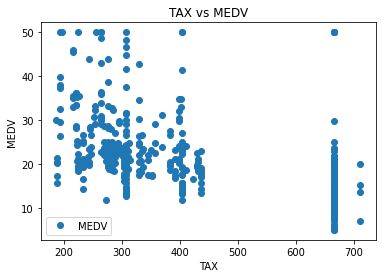

In [211]:
df1.plot(x='TAX', y='MEDV', style='o')
plt.title('TAX vs MEDV')
plt.xlabel('TAX')
plt.ylabel('MEDV')
plt.show()

In [212]:
df1[['TAX','MEDV']].corr()

,TAX,MEDV
TAX,1.000000,-0.479308
MEDV,-0.479308,1.000000


There is a Linear relationship in betweeen the TAX feature and MEDV target.

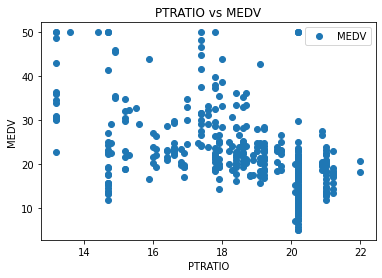

In [213]:
df1.plot(x='PTRATIO', y='MEDV', style='o')
plt.title('PTRATIO vs MEDV')
plt.xlabel('PTRATIO')
plt.ylabel('MEDV')
plt.show()

In [214]:
df1[['PTRATIO','MEDV']].corr()

,PTRATIO,MEDV
PTRATIO,1.000000,-0.495193
MEDV,-0.495193,1.000000


There is a Linear relationship in between the PTRATIO feature and MEDV target.

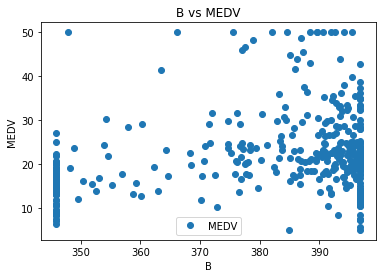

In [215]:
df1.plot(x='B', y='MEDV', style='o')
plt.title('B vs MEDV')
plt.xlabel('B')
plt.ylabel('MEDV')
plt.show()

In [216]:
df1[['B','MEDV']].corr()

,B,MEDV
B,1.000000,0.261889
MEDV,0.261889,1.000000


There is a Linear relationship in between the B feature and MEDV target.

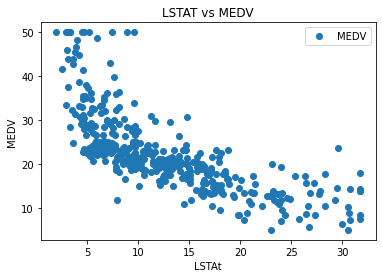

In [217]:
df1.plot(x='LSTAT', y='MEDV', style='o')
plt.title('LSTAT vs MEDV')
plt.xlabel('LSTAt')
plt.ylabel('MEDV')
plt.show()

In [218]:
df1[['LSTAT','MEDV']].corr()

,LSTAT,MEDV
LSTAT,1.000000,-0.732367
MEDV,-0.732367,1.000000


There is a Linear relatonship in between the LSTAT feature and MEDV target.

In [219]:
df2 = pd.read_csv('/content/test.csv')
df2.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.10612,30.0,4.93,0,0.428,6.095,65.1,6.3361,6,300.0,16.6,394.62,12.40
1,1,0.34109,0.0,7.38,0,0.493,6.415,40.1,4.7211,5,287.0,19.6,396.90,6.12
2,2,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666.0,20.2,24.65,15.69
3,3,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45
4,4,1.80028,0.0,19.58,0,0.605,5.877,79.2,2.4259,5,403.0,14.7,227.61,12.14


In [220]:
df3=df2.drop(columns="ID")
df3.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.10612,30.0,4.93,0,0.428,6.095,65.1,6.3361,6,300.0,16.6,394.62,12.40
1,0.34109,0.0,7.38,0,0.493,6.415,40.1,4.7211,5,287.0,19.6,396.90,6.12
2,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666.0,20.2,24.65,15.69
3,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45
4,1.80028,0.0,19.58,0,0.605,5.877,79.2,2.4259,5,403.0,14.7,227.61,12.14


In [221]:
df3.shape

(105, 13)

In [245]:
X_train = df1.drop(["MEDV"], axis=1)
y_train = df1["MEDV"]
X_test = df3.iloc[:,0:13]

In [246]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [247]:
df1.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [248]:
y_pred = regressor.predict(X_test)
y_pred

array([ 23.92172413,  25.41542179,  14.50568229,  20.07706052,
        23.07121416,  22.46831865,  18.49517468,  21.93235301,
        33.60932006,  16.20131517,  25.88405694,  22.78869193,
        20.45130939,  16.06241703,  20.46977133,  27.12219743,
        16.84611037,  25.22090127,  19.31628446,  21.76398239,
        26.10404227,  37.66723842,  23.47329557,   6.12489726,
        13.69685686,   6.17599255,  16.09780522,  20.21535777,
        24.24675627,  14.5138708 ,  37.2763843 ,  18.59257849,
        18.28715702,  18.70807612,  26.30919141,  20.51314594,
        31.4490195 ,  31.52639679,  40.05125405,  26.25542624,
        18.12670013,  31.46710311,  25.13840445,  15.65703405,
        21.37229862,  26.93681233,  17.38921953,  24.4247496 ,
        14.2424666 ,  12.95406085,  19.79244923,  33.62603193,
        24.60596626, -16.74862417,  12.32397428,  15.75202756,
        20.60131322,  13.5749084 ,   6.95094377,  18.43596037,
        19.69625904,  19.7573437 ,  32.67100001,  24.75

In [249]:
y_test = np.array(y_test)
y_test

array([14.8, 25. , 41.3, 18.4, 19.8, 20.6, 15. , 13.4, 23.1, 19.8, 50. ,
       22. , 21.7,  5. , 26.7,  8.3, 16.1, 20.2, 28.5, 20.8, 29.4, 24.3,
       18.1, 22.1, 24. , 39.8, 18.4, 27.1, 23.9, 24.5, 21.2, 19.2, 20. ,
       29.6, 19.1, 10.5, 28.1, 29. , 20.9, 20.6, 30.5, 22.4, 33.8, 16.6,
       28.4, 19.6, 28.2, 13.5, 17.8, 14.2,  8.4, 13.1, 15.3, 22.9, 20.6,
       14.4, 24.4, 22.4, 29.1, 19.2, 21. ,  7.4, 16.3, 21.7, 16.6, 20.3,
       18.7, 13.6, 19.5, 27.5, 22.7, 24.5, 18.9, 15. , 22.8, 50. , 24.8,
       23. , 22.8, 20.6, 13.8, 31. , 22. , 32.4, 18.5, 41.7, 30.7, 30.1,
       10.4,  8.8, 23.1, 28.7, 43.1, 23.9, 23.4, 13.1, 24.7, 16.1, 31.6,
       24.2, 26.6, 30.8, 20. , 17.6, 24.8])

In [240]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_validate

from sklearn.linear_model import Lasso, Ridge
for alpha in [0.001,0.002,0.003,0.005,0.01,0.02,0.03,0.04,0.1,0.2,0.5,1]:
  regressor = Ridge(normalize=True,alpha = alpha)
  cv_results = cross_validate(regressor, X_train, y_train, cv=5, scoring = "r2" , return_train_score=True)
  print("Alpha : ", alpha, cv_results['test_score'].mean(), cv_results['train_score'].mean())


Alpha :  0.001 0.6957233134894937 0.7302009203199356
Alpha :  0.002 0.6959311456807227 0.7301901216173026
Alpha :  0.003 0.6961259261486898 0.7301729545386608
Alpha :  0.005 0.6964801787882117 0.7301218226784443
Alpha :  0.01 0.6971957035880754 0.7299169996138082
Alpha :  0.02 0.6981163240873942 0.7292993539046508
Alpha :  0.03 0.6986046767784682 0.7285322990312857
Alpha :  0.04 0.6988182553518906 0.7276876631258294
Alpha :  0.1 0.6973221584231242 0.7220439386738888
Alpha :  0.2 0.6906486516050696 0.7119331743962067
Alpha :  0.5 0.6624960401562745 0.6801719730610866
Alpha :  1 0.613825668735881 0.6301438216966531


The train score of Ridge model is 0.73.

The test score of Ridge model is 0.6957.

In [243]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_validate

from sklearn.linear_model import Lasso, Ridge
for alpha in [0.001,0.002,0.003,0.005,0.01,0.02,0.03,0.04,0.1,0.2,0.5,1]:
  regressor = Lasso(normalize=True,alpha = alpha)
  cv_results = cross_validate(regressor, X_train, y_train, cv=5, scoring = "r2" , return_train_score=True)
  print("Beta : ", alpha, cv_results['test_score'].mean(), cv_results['train_score'].mean())


Beta :  0.001 0.6964471695744221 0.7299617792385018
Beta :  0.002 0.6970193576648407 0.729251461824296
Beta :  0.003 0.6976683401427387 0.7281487716214007
Beta :  0.005 0.6980319145710785 0.7249640331223075
Beta :  0.01 0.6939442673018629 0.7165947230476281
Beta :  0.02 0.6823568340934572 0.7036719652747948
Beta :  0.03 0.6672200490659679 0.6863948452417193
Beta :  0.04 0.6594060719269653 0.677643902564688
Beta :  0.1 0.6063602459968035 0.6177565435579245
Beta :  0.2 0.43715626608778885 0.4505065456158176
Beta :  0.5 -0.018308870567480495 0.0
Beta :  1 -0.018308870567480495 0.0


The train score of lasso model is 0.7299.

The test score of lasso model is 0.69644.